In [75]:
import quandl
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from numpy import where

In [67]:
def weekly_avg_adj_close_percent(symbol,timerange='all',plot= False):
    #Daten einlesen
    mydata1 = quandl.get("WIKI/{}".format(symbol))
    #Datentyp umwandeln
    mydata1['date_timestamp'] = pd.to_datetime(mydata1.index)
    mydata1['date_datetime']= mydata1['date_timestamp'].dt.date
    mydata1['wochentag']=mydata1['date_timestamp'].dt.dayofweek
    #prozentuale aenderung ermitteln
    mydata1['Adj. Close percent'] = mydata1['Adj. Close'].pct_change()
    #filtern
    mydata1_filter = mydata1[['wochentag','Adj. Close percent']]
    df_weekly_perc = mydata1_filter.groupby('wochentag').agg('mean')
    if plot:
        df_weekly_perc.plot.bar(title=symbol)
    return df_weekly_perc

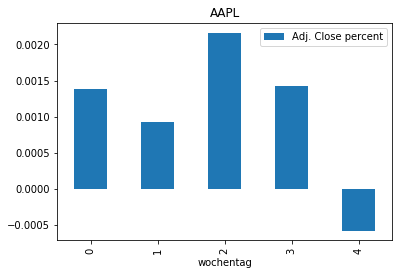

In [68]:
df_weekly_perc_aapl = weekly_avg_adj_close_percent(symbol,plot=True)

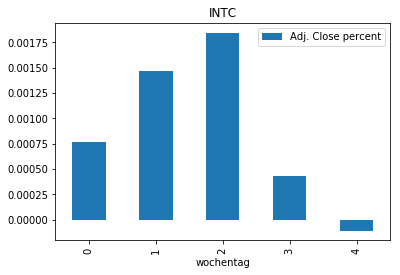

In [71]:
df_weekly_perc_intc = weekly_avg_adj_close_percent(symbol = 'INTC',plot=True)

,Adj. Close percent
wochentag,
0,-0.001550
1,0.000255
2,0.001481
3,0.002016
4,0.000952


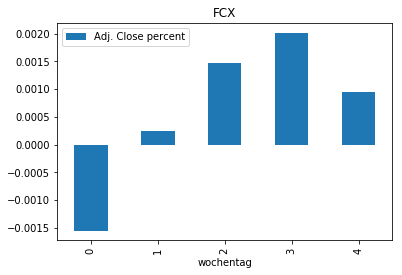

In [74]:
weekly_avg_adj_close_percent(symbol = 'FCX',plot=True)

In [77]:
def weekly_wins_losses_adj_close_percent(symbol,timerange='all',plot= False):
    #Daten einlesen
    mydata1 = quandl.get("WIKI/{}".format(symbol))
    #Datentyp umwandeln
    mydata1['date_timestamp'] = pd.to_datetime(mydata1.index)
    mydata1['date_datetime']= mydata1['date_timestamp'].dt.date
    mydata1['wochentag']=mydata1['date_timestamp'].dt.dayofweek
    #prozentuale aenderung ermitteln
    mydata1['Adj. Close percent'] = mydata1['Adj. Close'].pct_change()
    mydata1['adj_close_win_lose'] = mydata1['color'] = where(mydata1['Adj. Close percent']>=0., 1, -1)
    #filtern
    mydata1_filter = mydata1[['wochentag','adj_close_win_lose']]
    df_weekly_perc = mydata1_filter.groupby('wochentag').agg('sum')
    if plot:
        df_weekly_perc.plot.bar(title=symbol)
    return df_weekly_perc

,adj_close_win_lose
wochentag,
0,185
1,116
2,135
3,94
4,48


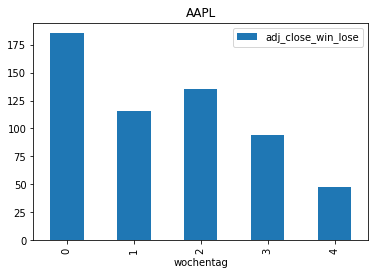

In [78]:
weekly_wins_losses_adj_close_percent(symbol='AAPL',plot = True)

,adj_close_win_lose
wochentag,
0,141
1,178
2,196
3,44
4,82


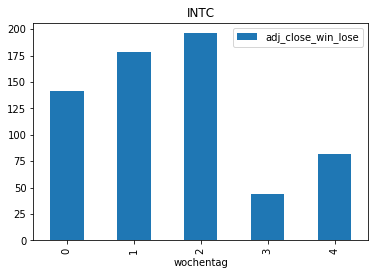

In [79]:
weekly_wins_losses_adj_close_percent(symbol='INTC',plot = True)

,adj_close_win_lose
wochentag,
0,24
1,66
2,84
3,46
4,53


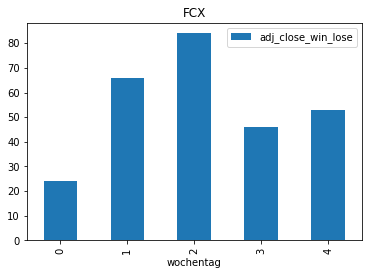

In [80]:
weekly_wins_losses_adj_close_percent(symbol='FCX',plot = True)

,adj_close_win_lose
wochentag,
0,51
1,153
2,288
3,202
4,127


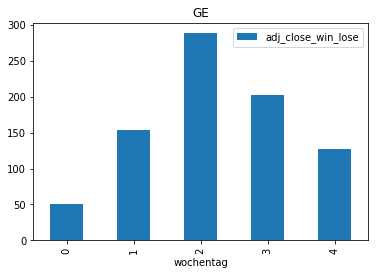

In [81]:
weekly_wins_losses_adj_close_percent(symbol='GE',plot = True)